# ECON 3110 Midterm Review Notebook

This notebook provides a visual and conceptual review of the key topics for your midterm exam.

## (a) Key Graphs for the Exam

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1. The Budget Line

The budget line shows all combinations of two goods a consumer can afford. Its equation is $P_x x + P_y y = M$.

- **Slope:** $-P_x / P_y$. This is the rate at which the market lets you trade y for x.
- **Shifts:** The line shifts out in parallel if income (M) increases.
- **Pivots:** The line pivots if a price changes. If $P_x$ increases, the line pivots inwards around the y-intercept, becoming steeper.

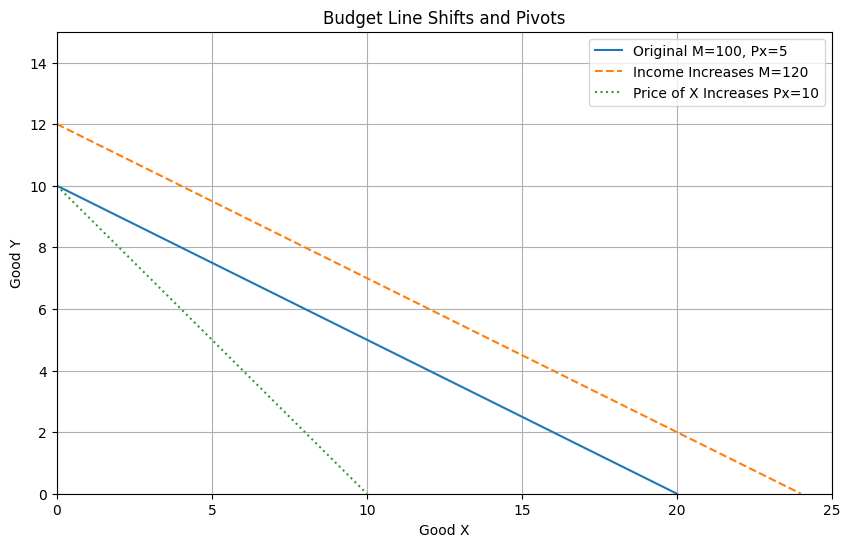

In [2]:
def plot_budget_line(M, Px, Py, label, style='-'):
    x = np.linspace(0, M/Px, 100)
    y = (M - Px*x) / Py
    plt.plot(x, y, label=label, linestyle=style)

plt.figure(figsize=(10, 6))
plot_budget_line(100, 5, 10, 'Original M=100, Px=5')
plot_budget_line(120, 5, 10, 'Income Increases M=120', style='--')
plot_budget_line(100, 10, 10, 'Price of X Increases Px=10', style=':')
plt.title('Budget Line Shifts and Pivots')
plt.xlabel('Good X')
plt.ylabel('Good Y')
plt.xlim(0, 25)
plt.ylim(0, 15)
plt.legend()
plt.grid(True)
plt.show()

### 2. Indifference Curves & Optimal Choice

An indifference curve shows bundles that give the same utility. The optimal choice is where the highest indifference curve is *tangent* to the budget line. This is where $MRS = P_x / P_y$.

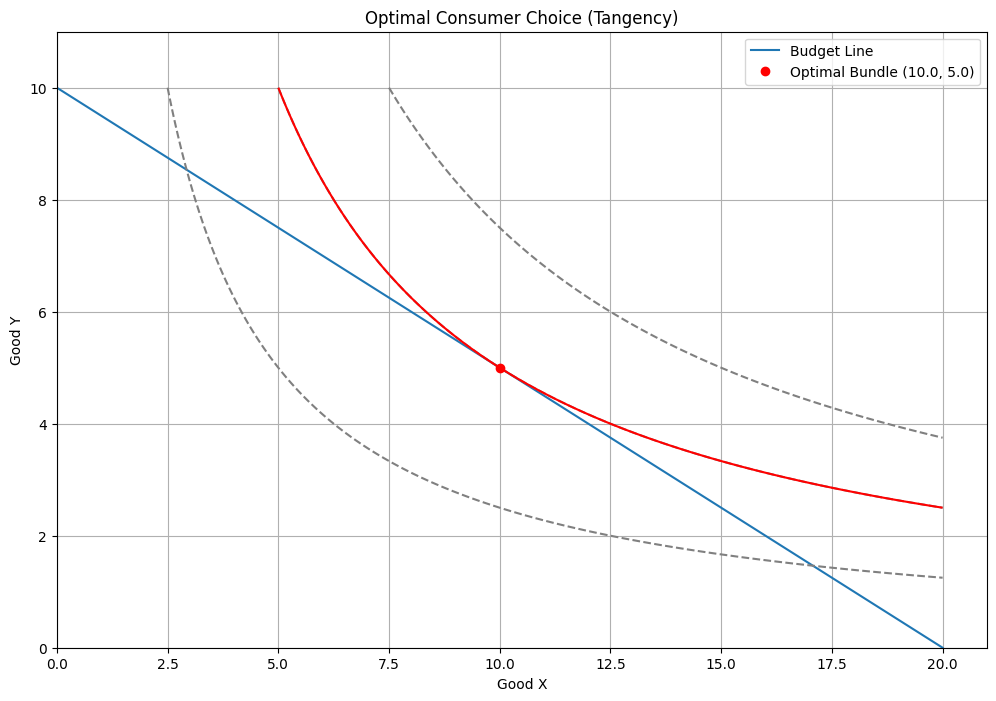

In [3]:
plt.figure(figsize=(12, 8))

# Budget Line
M, Px, Py = 100, 5, 10
x_budget = np.linspace(0, M/Px, 100)
y_budget = (M - Px*x_budget) / Py
plt.plot(x_budget, y_budget, label='Budget Line')

# Indifference Curves (for U=x*y)
x_vals = np.linspace(0.1, 20, 400)
y_vals = np.linspace(0.1, 10, 400)
X, Y = np.meshgrid(x_vals, y_vals)
U = X * Y
plt.contour(X, Y, U, levels=[25, 50, 75], linestyles='--', colors='gray')

# Optimal Point (solved via Cobb-Douglas shortcut)
x_opt = (0.5 * M) / Px
y_opt = (0.5 * M) / Py
plt.plot(x_opt, y_opt, 'ro', label=f'Optimal Bundle ({x_opt}, {y_opt})')
U_opt = x_opt * y_opt
plt.contour(X, Y, U, levels=[U_opt], colors='red') # Optimal IC

plt.title('Optimal Consumer Choice (Tangency)')
plt.xlabel('Good X')
plt.ylabel('Good Y')
plt.xlim(0, 21)
plt.ylim(0, 11)
plt.legend()
plt.grid(True)
plt.show()

### 3. Income and Substitution Effects (Slutsky)

This graph shows the decomposition of a price change. Here, the price of X falls.
- **A to C:** Total Effect
- **A to B:** Substitution Effect (move along the original indifference curve to a point where its slope equals the *new* price ratio).
- **B to C:** Income Effect (parallel shift from the hypothetical budget line to the final budget line).

/tmp/ipykernel_338/3733383883.py:38: UserWarning: Legend does not support handles for Annotation instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


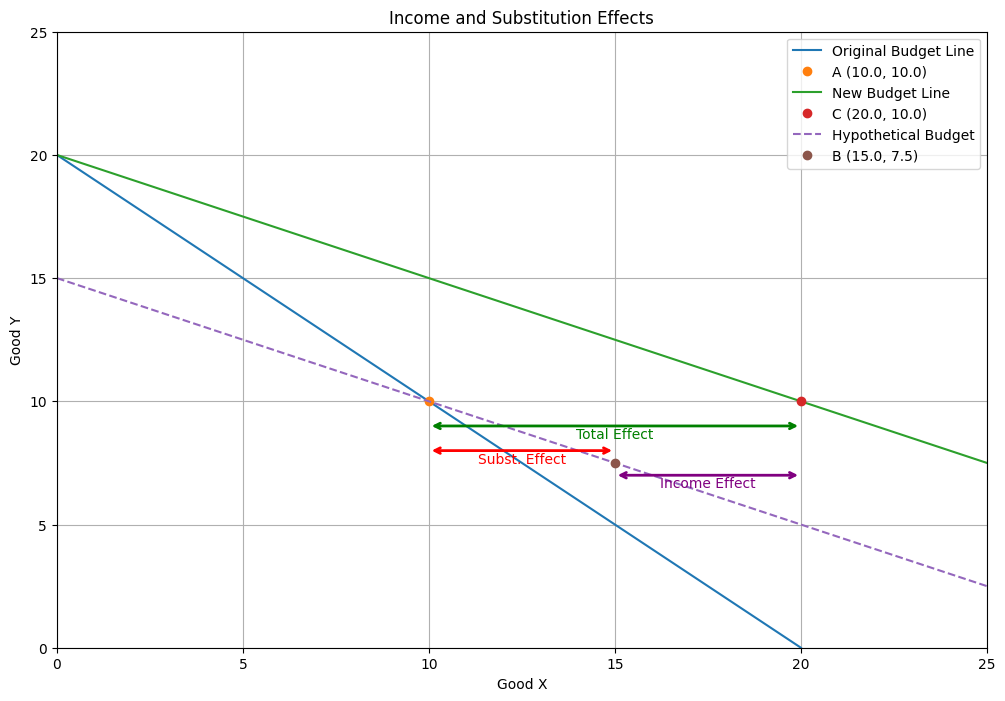

In [4]:
plt.figure(figsize=(12, 8))

# Initial State (Point A)
M, Px1, Py = 80, 4, 4
x_a = (0.5 * M) / Px1
y_a = (0.5 * M) / Py
u_a = x_a * y_a
plot_budget_line(M, Px1, Py, 'Original Budget Line', style='-')
plt.plot(x_a, y_a, 'o', label=f'A ({x_a:.1f}, {y_a:.1f})')

# Final State (Point C)
Px2 = 2
x_c = (0.5 * M) / Px2
y_c = (0.5 * M) / Py
plot_budget_line(M, Px2, Py, 'New Budget Line', style='-')
plt.plot(x_c, y_c, 'o', label=f'C ({x_c:.1f}, {y_c:.1f})')

# Hypothetical State (Point B)
M_prime = Px2*x_a + Py*y_a # Income needed to afford old bundle at new prices
x_b = (0.5 * M_prime) / Px2
y_b = (0.5 * M_prime) / Py
plot_budget_line(M_prime, Px2, Py, 'Hypothetical Budget', style='--')
plt.plot(x_b, y_b, 'o', label=f'B ({x_b:.1f}, {y_b:.1f})')

# Annotations
plt.annotate('', xy=(x_c, y_a-1), xytext=(x_a, y_a-1), arrowprops=dict(arrowstyle='<->', color='green', lw=2), label='Total Effect')
plt.text((x_a+x_c)/2, y_a-1.5, 'Total Effect', ha='center', color='green')
plt.annotate('', xy=(x_b, y_a-2), xytext=(x_a, y_a-2), arrowprops=dict(arrowstyle='<->', color='red', lw=2))
plt.text((x_a+x_b)/2, y_a-2.5, 'Subst. Effect', ha='center', color='red')
plt.annotate('', xy=(x_c, y_a-3), xytext=(x_b, y_a-3), arrowprops=dict(arrowstyle='<->', color='purple', lw=2))
plt.text((x_b+x_c)/2, y_a-3.5, 'Income Effect', ha='center', color='purple')

plt.title('Income and Substitution Effects')
plt.xlabel('Good X')
plt.ylabel('Good Y')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.legend()
plt.grid(True)
plt.show()

### 4. Isoquant and Isocost (Producer Theory)

This is the producer's version of the consumer problem. The goal is to find the cheapest combination of inputs (K, L) to produce a target quantity Q. The solution is at the tangency where the isoquant (technical trade-off) slope equals the isocost (market prices) slope.
$$ MRTS_{LK} = \frac{MP_L}{MP_K} = \frac{w}{r} $$

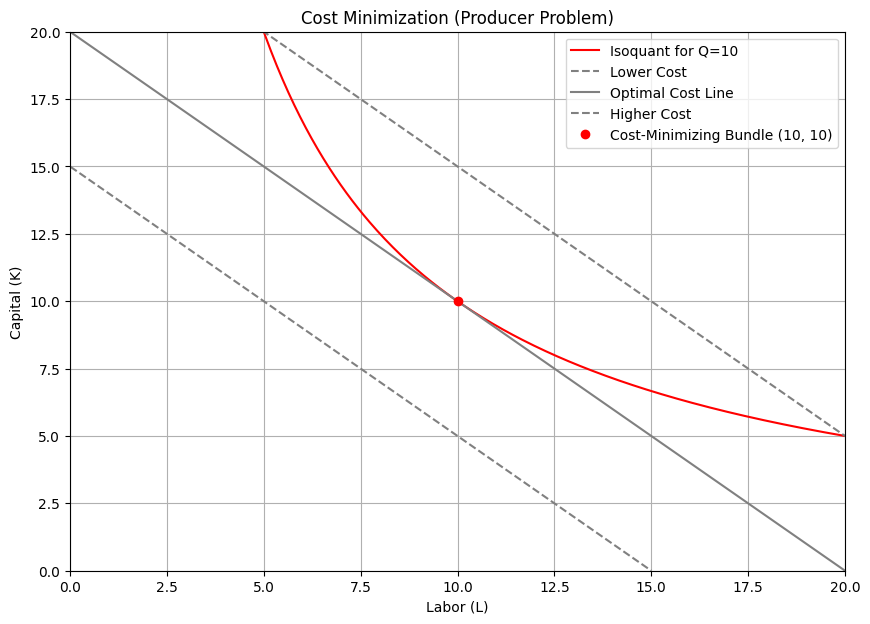

In [5]:
plt.figure(figsize=(10, 7))

# Isoquant for Q=10, F=K^0.5 * L^0.5
L = np.linspace(0.1, 20, 400)
Q = 10
K_isoquant = (Q**2) / L
plt.plot(L, K_isoquant, label=f'Isoquant for Q={Q}', color='red')

# Isocost Lines
w, r = 2, 2
def plot_isocost(C, w, r, label, style='--'):
    L_cost = np.linspace(0.01, C/w, 100)
    K_cost = (C - w*L_cost) / r
    plt.plot(L_cost, K_cost, label=label, linestyle=style, color='gray')

# Optimal Point (L=K for w=r)
L_opt = 10
K_opt = 10
C_opt = w*L_opt + r*K_opt

plot_isocost(C_opt - 10, w, r, 'Lower Cost')
plot_isocost(C_opt, w, r, 'Optimal Cost Line', style='-')
plot_isocost(C_opt + 10, w, r, 'Higher Cost')

plt.plot(L_opt, K_opt, 'ro', label=f'Cost-Minimizing Bundle ({L_opt}, {K_opt})')

plt.title('Cost Minimization (Producer Problem)')
plt.xlabel('Labor (L)')
plt.ylabel('Capital (K)')
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.legend()
plt.grid(True)
plt.show()

## (b) The Meaning of ∂x/∂M

The term $\frac{\partial x}{\partial M}$ represents the **partial derivative of the Marshallian demand function for good x with respect to income M**.

**In plain English:** It measures how the quantity demanded of good x changes when the consumer's income changes, assuming all prices ($P_x, P_y$, etc.) are held constant.

- If $\frac{\partial x}{\partial M} > 0$, good x is a **normal good**. As income rises, you buy more of it.
- If $\frac{\partial x}{\partial M} < 0$, good x is an **inferior good**. As income rises, you buy less of it (e.g., you switch from instant noodles to restaurant food).

### Example: Cobb-Douglas Utility
Let $U(x,y) = x^\alpha y^\beta$. We know from the shortcut that the demand for x is:
$$ x^*(P_x, P_y, M) = \left( \frac{\alpha}{\alpha+\beta} \right) \frac{M}{P_x} $$

Now, let's take the partial derivative with respect to $M$. We treat $\alpha, \beta$, and $P_x$ as constants.
$$ \frac{\partial x^*}{\partial M} = \frac{\partial}{\partial M} \left[ \left( \frac{\alpha}{\alpha+\beta} \right) \frac{1}{P_x} \cdot M \right] = \left( \frac{\alpha}{\alpha+\beta} \right) \frac{1}{P_x} $$
Since $\alpha, \beta,$ and $P_x$ are all positive, the entire expression $\frac{\partial x^*}{\partial M}$ is **always positive**.
This proves that for any Cobb-Douglas utility function, both goods are always **normal goods**.

## (c) Elasticity

Elasticity is a unit-free measure of responsiveness. The general formula for the elasticity of $y$ with respect to $x$ is:
$$ \epsilon_{y,x} = \frac{\% \Delta y}{\% \Delta x} = \frac{\partial y}{\partial x} \frac{x}{y} $$

### 1. Own-Price Elasticity of Demand
Measures how quantity demanded responds to a change in its own price.
$$ \epsilon_{Q,P} = \frac{\partial Q}{\partial P} \frac{P}{Q} $$
- If $|\epsilon| > 1$: **Elastic** (quantity is very responsive to price changes).
- If $|\epsilon| < 1$: **Inelastic** (quantity is not very responsive).
- If $|\epsilon| = 1$: **Unit Elastic**.

### 2. Income Elasticity of Demand
Measures how quantity demanded responds to a change in income.
$$ \epsilon_{Q,M} = \frac{\partial Q}{\partial M} \frac{M}{Q} $$
- If $\epsilon > 0$: **Normal Good**.
- If $\epsilon < 0$: **Inferior Good**.

### 3. Cross-Price Elasticity of Demand
Measures how the quantity demanded of good X responds to a change in the price of *another* good, Y.
$$ \epsilon_{Q_x, P_y} = \frac{\partial Q_x}{\partial P_y} \frac{P_y}{Q_x} $$
- If $\epsilon > 0$: Goods are **Substitutes** (If Pepsi gets more expensive, you buy more Coke).
- If $\epsilon < 0$: Goods are **Complements** (If hot dogs get more expensive, you buy fewer hot dog buns).

## (d) Welfare Measures: CV and EV

CV and EV are ways to measure the impact of a price change in dollar terms. They are more accurate than Consumer Surplus when preferences are not quasi-linear.

**Setup:** A consumer has income $M$ and faces a price increase from $P_{old}$ to $P_{new}$.
- **Old utility:** $u_{old} = v(P_{old}, M)$
- **New utility:** $u_{new} = v(P_{new}, M)$

### Compensating Variation (CV)
**Question:** How much money would we have to *give* the consumer *after* the price increase to make them as happy as they were before?

**Formula:** $CV = e(P_{new}, u_{old}) - M$

It's the cost of reaching the *old* utility level at the *new* prices, minus your original income.

### Equivalent Variation (EV)
**Question:** What is the maximum amount of money the consumer would be willing to *pay* to *avoid* the price increase?

**Formula:** $EV = M - e(P_{old}, u_{new})$

It's your original income minus what it would cost to be at your *new*, lower utility level if prices had *stayed at the old* level.

**Key Relationship:** For normal goods, for a price increase, $CV > EV$.

## (e) Certainty Equivalent (CE) and Risk Aversion

This section shows how a risk-averse person values a lottery.

**The Scenario:**
- A lottery offers a 50% chance of winning \$100 and a 50% chance of winning \$0.
- The person's utility of wealth is $U(W) = \sqrt{W}$.

### Step 1: Calculate the Expected Value (EV)
This is the average monetary outcome.
$$ EV = (0.5 \times \$100) + (0.5 \times \$0) = \$50 $$

### Step 2: Calculate the Expected Utility (EU)
This is the average happiness outcome.
$$ EU = (0.5 \times U(100)) + (0.5 \times U(0)) = (0.5 \times \sqrt{100}) + (0.5 \times \sqrt{0}) = (0.5 \times 10) + 0 = 5 \text{ utils} $$

### Step 3: Calculate the Certainty Equivalent (CE)
The CE is the amount of *guaranteed* money ($W_c$) that gives the same utility as the lottery. We solve for $W_c$ in the equation $U(W_c) = EU$.
$$ \sqrt{W_c} = 5 \implies W_c = 5^2 = \$25 $$

### Step 4: Test for Risk Aversion
We compare the CE and the EV.
$$ CE (\$25) < EV (\$50) $$
Because the person is willing to accept a certain payment (\$25) that is *less* than the average payout of the lottery (\$50), they are **risk-averse**. The difference, \$25, is the **risk premium**.

### Step 5: The Calculus Test (Concavity)
Risk aversion is equivalent to a concave utility function. A function is strictly concave if its second derivative is negative.
- **Utility Function:** $U(W) = W^{1/2}$
- **First Derivative:** $U'(W) = \frac{1}{2} W^{-1/2}$. This is the marginal utility of wealth, which is positive.
- **Second Derivative:** $U''(W) = \left(\frac{1}{2}\right) \left(-\frac{1}{2}\right) W^{-3/2} = -\frac{1}{4} W^{-3/2}$

Since wealth $W$ is always positive, $W^{-3/2}$ is positive. Therefore, $U''(W) = -\frac{1}{4} W^{-3/2}$ is **always negative**. This proves the function is strictly concave and the individual is risk-averse.